# AVATAR THE LAST AIR-BENDER

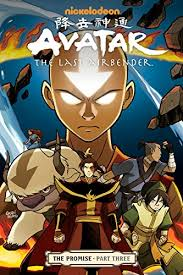

<br>

Avatar: The Last Airbender (Avatar: The Legend of Aang in some regions) is an American animated television series created by Michael Dante DiMartino and Bryan Konietzko, with Aaron Ehasz as head writer. The show is also referred to as Avatar or ATLA by fans. It aired on Nickelodeon for three seasons, from February 2005 to July 2008.[2] Avatar is set in an Asiatic-like world in which some people can manipulate the classical elements with telekinetic variants of the Chinese martial arts known as "bending". One individual, the Avatar, is capable of bending all four elements and is responsible for maintaining harmony between the world's four nations. It is presented in a style that combines anime with American cartoons, and relies on the imagery of East Asian, South Asian, Inuit, and New World societies.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
series=pd.read_csv("/kaggle/input/avatar-the-last-air-bender/series_names.csv")
series.head()

In [ ]:
series.halfway.plot(kind="pie",figsize=(10,10),autopct="%1.1f%%",explode=(0,0.05,0),shadow=True)

In [ ]:
data=pd.read_csv("../input/avatar-the-last-air-bender/avatar_data.csv")
data.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
data.book=lab.fit_transform(data.book)

In [ ]:
import seaborn as sns
sns.jointplot(data.book,data.imdb_rating,kind="kde")

In [ ]:
plt.figure(figsize=(15,9))
sns.lineplot(data.imdb_rating, data.series_rating, color="g")

In [ ]:
scenes=pd.read_csv("../input/avatar-the-last-air-bender/scenes.csv", encoding= 'unicode_escape')
scenes.head()

In [ ]:
def sentence(x):
    a=x.split('[')
    b=a[1].split(']')
    return b[0]
scenes["scene_description"]=scenes["scene_description"].apply(sentence)

In [ ]:
scenes.head()

In [ ]:
import re
def process(x):
    processed_tweet = re.sub(r'\W', ' ', str(x))
    processed_tweet = re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_tweet)
    processed_tweet = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_tweet) 
    processed_tweet= re.sub(r'\s+', ' ', processed_tweet, flags=re.I)
    processed_tweet = re.sub(r'^b\s+', '', processed_tweet)
    processed_tweet = processed_tweet.lower()
    return processed_tweet
scenes.scene_description=scenes.scene_description.apply(process)

In [ ]:
import nltk
from nltk.stem import PorterStemmer,LancasterStemmer
stemming =PorterStemmer()
def identify_tokens(row):
    tokens = nltk.word_tokenize(row)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words
def stem_list(row):
    stemmed_list = [stemming.stem(word) for word in row]
    return (stemmed_list)
def rejoin_words(row):
    joined_words = ( " ".join(row))
    return joined_words
scenes.scene_description=scenes.scene_description.apply(identify_tokens)
scenes.scene_description=scenes.scene_description.apply(stem_list)
scenes.scene_description=scenes.scene_description.apply(rejoin_words)

In [ ]:
from textblob import TextBlob
scenes.scene_description=scenes.scene_description.apply(lambda x:TextBlob(x).sentiment.subjectivity)

In [ ]:
scenes.head()